<a href="https://colab.research.google.com/github/Zulfatinnafisah/Kumpulan-Tugas-Kampus-Merdeka/blob/main/Activity_4_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Means Clustering for Customer Segmentation

Customer segmentation is the process of examining customer attributes and creating groups based on how they behave, who they are, and their specific characteristics. Customer segmentation allows businesses to use targeted messaging, rather than taking a one-size-fits-all approach, to drive business results. 

For example, a company that sells a music streaming service could segment its customer base according to the genres customers listen to, the times of day they typically listen, and the devices they use to stream music. The company could then use insights to attract more music lovers who match those characteristics. 

Types of Market Segmentation & Segmentation Examples

1. Demografic segmentation
2. Geographic segmentation
3. Psychographic segmentation
4. Technographic segmentation
5. Behavioral segmentation
6. Needs-based segmentation
7. Value-based segmentation

Another approach for customer segmentation
1. Cohort Analysis
2. Recency, Frequency, Monetary
3. Machine Learning




## K Means Clustering using Consument Data

### Library Import

We need to import some basic library and library contain clustering function

In [ ]:
import pandas as pd                                                              # Library for data analytics in python
import numpy as np                                                               # Library for numerical computation python

import matplotlib.pyplot as plt                                                  # Library for data visualization
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer                                 # Library for Elbow method

from sklearn.cluster import KMeans                                               # Library for K Means Clustering using sklearn             

### Data Load

In this first example we will using Mall Customer dataset that contain Customer ID, Gender, Age, Annual Income and Spending Score. The last two variable will used for clustering to get a customer segment.

Data Source:https://www.kaggle.com/shwetabh123/mall-customers?select=Mall_Customers.csv

In [ ]:
# Load dataframe from csv data and show the first five rows of the data
df = pd.read_csv('https://raw.githubusercontent.com/jokoeliyanto/SCML2022/main/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
df.sample(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
40,41,Female,65,38,35
187,188,Male,28,101,68
127,128,Male,40,71,95
148,149,Female,34,78,22
130,131,Male,47,71,9
67,68,Female,68,48,48
197,198,Male,32,126,74
12,13,Female,58,20,15
169,170,Male,32,87,63
25,26,Male,29,28,82


In [ ]:
# Get the full information of the data to check data type and missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


We don't find any missing data or wrong data type for next step.

### Data Preparation

We need to prepare the data for K Means Clustering modelling, first we need to take only Annual Income and Spending Score as a matrix X variables.

In [ ]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
X = np.array(df[['Annual Income (k$)','Spending Score (1-100)']])
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

### Get the number of cluster recommendation using Elbow Method

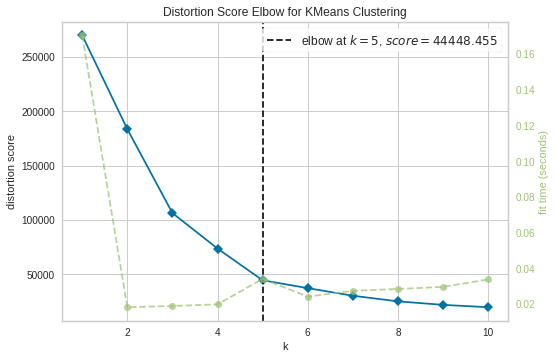

In [ ]:
model = KMeans()                                               # Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(model, k=(1, 11))                # Check the distortion/average distance in cluster if we create 1 to 11 group
visualizer.fit(X)                                              # Fit the data to the visualizer
visualizer.show()                                              # Finalize and render the figure
plt.show()

Based on that visualization we get the recommendation to make a five cluster

### Train The K Means Clustering Model

In [ ]:
km_model = KMeans(n_clusters=5, random_state=10)              # instatiate KMeans class and set the number of clusters
cluster_result = km_model.fit_predict(X)                      # call fit method with data 
centroids = km_model.cluster_centers_                         # coordinates of cluster center
labels = km_model.labels_                                     # cluster label for each data point

We can save the label cluster as a new column in the tabel below

In [ ]:
df_cluster = pd.DataFrame(X, columns=['Annual Income (k$)','Spending Score (1-100)'])
df_cluster['cluster'] = labels
df_cluster.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,3
1,15,81,0
2,16,6,3
3,16,77,0
4,17,40,3


### Visualize The Cluster Result

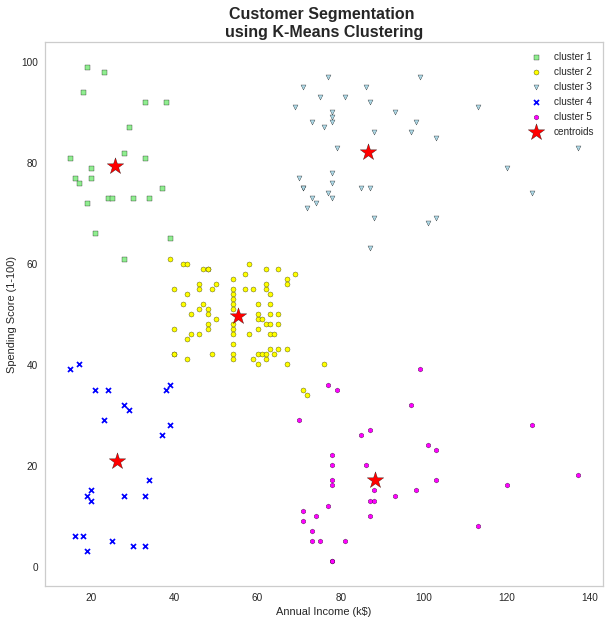

In [ ]:
# create matplotlib figure and axes object
fig, ax=plt.subplots(figsize=(10,10))

# visualise cluster
ax.scatter(
    df_cluster[df_cluster.cluster==0]['Annual Income (k$)'], df_cluster[df_cluster.cluster==0]['Spending Score (1-100)'],
    s=25, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

ax.scatter(
    df_cluster[df_cluster.cluster==1]['Annual Income (k$)'], df_cluster[df_cluster.cluster==1]['Spending Score (1-100)'],
    s=25, c='yellow',
    marker='o', edgecolor='black',
    label='cluster 2'
)

ax.scatter(
    df_cluster[df_cluster.cluster==2]['Annual Income (k$)'], df_cluster[df_cluster.cluster==2]['Spending Score (1-100)'],
    s=25, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

ax.scatter(
    df_cluster[df_cluster.cluster==3]['Annual Income (k$)'], df_cluster[df_cluster.cluster==3]['Spending Score (1-100)'],
    s=25, c='blue',
    marker='x', edgecolor='black',
    label='cluster 4'
)

ax.scatter(
    df_cluster[df_cluster.cluster==4]['Annual Income (k$)'], df_cluster[df_cluster.cluster==4]['Spending Score (1-100)'],
    s=25, c='magenta',
    marker='h', edgecolor='black',
    label='cluster 5'
)

# visualise centroids
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.title("Customer Segmentation \nusing K-Means Clustering", fontweight="bold", fontsize=16)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(scatterpoints=1, loc='best')
plt.grid()
plt.show()

### Evaluate The Cluster Result

https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

In [ ]:
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score

In [ ]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
silhouete_score = metrics.silhouette_score(X, labels, metric='euclidean')
dbi_index = davies_bouldin_score(X, labels)

In [ ]:
silhouete_score

0.553931997444648

In [ ]:
dbi_index

0.5725628995597086

The cluster result is good enough

### Cluster Explanation

We go back tou our cluster visualization to try understandinng the characteristics of each cluster

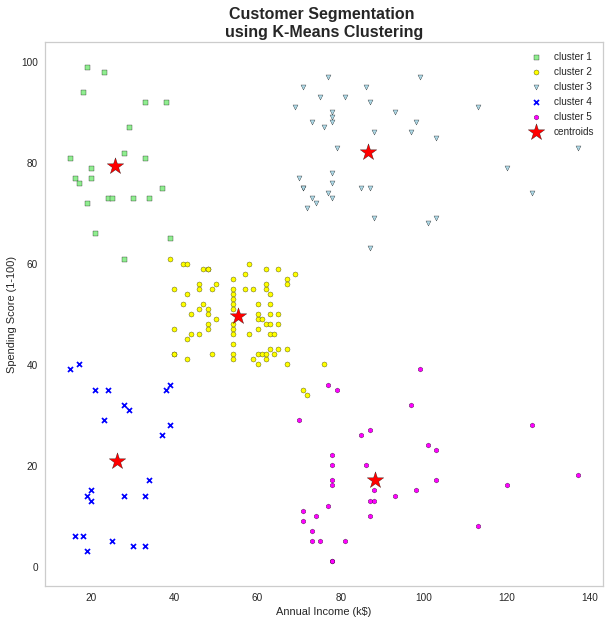

In [ ]:
# create matplotlib figure and axes object
fig, ax=plt.subplots(figsize=(10,10))

# visualise cluster
ax.scatter(
    df_cluster[df_cluster.cluster==0]['Annual Income (k$)'], df_cluster[df_cluster.cluster==0]['Spending Score (1-100)'],
    s=25, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

ax.scatter(
    df_cluster[df_cluster.cluster==1]['Annual Income (k$)'], df_cluster[df_cluster.cluster==1]['Spending Score (1-100)'],
    s=25, c='yellow',
    marker='o', edgecolor='black',
    label='cluster 2'
)

ax.scatter(
    df_cluster[df_cluster.cluster==2]['Annual Income (k$)'], df_cluster[df_cluster.cluster==2]['Spending Score (1-100)'],
    s=25, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

ax.scatter(
    df_cluster[df_cluster.cluster==3]['Annual Income (k$)'], df_cluster[df_cluster.cluster==3]['Spending Score (1-100)'],
    s=25, c='blue',
    marker='x', edgecolor='black',
    label='cluster 4'
)

ax.scatter(
    df_cluster[df_cluster.cluster==4]['Annual Income (k$)'], df_cluster[df_cluster.cluster==4]['Spending Score (1-100)'],
    s=25, c='magenta',
    marker='h', edgecolor='black',
    label='cluster 5'
)

# visualise centroids
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.title("Customer Segmentation \nusing K-Means Clustering", fontweight="bold", fontsize=16)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(scatterpoints=1, loc='best')
plt.grid()
plt.show()

In [ ]:
df_cluster

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,3
1,15,81,0
2,16,6,3
3,16,77,0
4,17,40,3
...,...,...,...
195,120,79,2
196,126,28,4
197,126,74,2
198,137,18,4


In [ ]:
df_cluster['cluster'] = df_cluster['cluster']+1

In [ ]:
df_cluster['Annual Income (k$)']

0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Annual Income (k$), Length: 200, dtype: int64

In [ ]:
df_annual_income = df_cluster.groupby(df_cluster['cluster'])[['Annual Income (k$)']].mean().reset_index(drop=False)
df_annual_income.columns = ['cluster','Average Annual Income (k$)']
df_annual_income 

,cluster,Average Annual Income (k$)
0,1,25.727273
1,2,55.296296
2,3,86.538462
3,4,26.304348
4,5,88.200000


In [ ]:
df_avg_annual_income = df_cluster.groupby(df_cluster['cluster'])[['Annual Income (k$)']].mean().reset_index(drop=False).sort_values('cluster')
df_avg_annual_income.columns = ['cluster','Average Annual Income (k$)']

df_min_annual_income = df_cluster.groupby(df_cluster['cluster'])[['Annual Income (k$)']].min().reset_index(drop=False).sort_values('cluster')
df_min_annual_income.columns = ['cluster','Min Annual Income (k$)']

df_max_annual_income = df_cluster.groupby(df_cluster['cluster'])[['Annual Income (k$)']].max().reset_index(drop=False).sort_values('cluster')
df_max_annual_income.columns = ['cluster','Max Annual Income (k$)']

df_annual_income = pd.DataFrame({"cluster":df_avg_annual_income["cluster"],
                                 "mean":df_avg_annual_income["Average Annual Income (k$)"],
                                 "min":df_min_annual_income["Min Annual Income (k$)"],
                                 "max":df_max_annual_income["Max Annual Income (k$)"]})

df_annual_income

,cluster,mean,min,max
0,1,25.727273,15,39
1,2,55.296296,39,76
2,3,86.538462,69,137
3,4,26.304348,15,39
4,5,88.200000,70,137


In [ ]:
df_avg_spending_score = df_cluster.groupby(df_cluster['cluster'])[['Spending Score (1-100)']].mean().reset_index(drop=False).sort_values('cluster')
df_avg_spending_score.columns = ['cluster','Average Spending Score (1-100)']

df_min_spending_score = df_cluster.groupby(df_cluster['cluster'])[['Spending Score (1-100)']].min().reset_index(drop=False).sort_values('cluster')
df_min_spending_score.columns = ['cluster','Min Spending Score (1-100)']

df_max_spending_score = df_cluster.groupby(df_cluster['cluster'])[['Spending Score (1-100)']].max().reset_index(drop=False).sort_values('cluster')
df_max_spending_score.columns = ['cluster','Max Spending Score (1-100)']

df_spending_score = pd.DataFrame({"cluster":df_avg_annual_income["cluster"],
                                 "mean":df_avg_spending_score["Average Spending Score (1-100)"],
                                 "min":df_min_spending_score["Min Spending Score (1-100)"],
                                 "max":df_max_spending_score["Max Spending Score (1-100)"]})

df_spending_score

,cluster,mean,min,max
0,1,79.363636,61,99
1,2,49.518519,34,61
2,3,82.128205,63,97
3,4,20.913043,3,40
4,5,17.114286,1,39


Cluster Explanation:


1. Cluster 1:  **Low Annual Income** with average 25.27 between 15 - 39 kilo USD and **High Spending Score**  with average 79.36 between 61 - 99 
2. Cluster 2:  **Midle Annual Income** with average 55.29 between 39 - 76  kilo USD and **Midle Spending Score**  with average 49.51 between 34 - 61 
3. Cluster 3:  **High Annual Income** with average 86.53 between 69 - 137 kilo USD and **High Spending Score**  with average 82.12 between 63 - 97 
4. Cluster 4:  **Low Annual Income** with average 26.30 between 15 - 39  kilo USD and **Low Spending Score**  with average 20 between 3 - 40 
5. Cluster 5:  **High Annual Income** with average 88.20 between 70 - 137  kilo USD and **Low Spending Score**  with average 17 between 1 - 39 



# K Means Clustering for Customer Segmentations using RFM Analysis

RFM analysis ranks each customer on the following factors:

1. **Recency.** How recent was the customer's last purchase? Customers who recently made a purchase will still have the product on their mind and are more likely to purchase or use the product again. Businesses often measure recency in days. But, depending on the product, they may measure it in years, weeks or even hours.

2. **Frequency.** How often did this customer make a purchase in a given period? Customers who purchased once are often are more likely to purchase again. Additionally, first time customers may be good targets for follow-up advertising to convert them into more frequent customers.

3. **Monetary.** How much money did the customer spend in a given period? Customers who spend a lot of money are more likely to spend money in the future and have a high value to a business.

### Data Load

In [ ]:
#Import Online Retail Data containing transactions
Rtl_data = pd.read_excel('https://raw.githubusercontent.com/jokoeliyanto/SCML2022/main/onlineretail_sample.xlsx')
Rtl_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
Rtl_data.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
83297,543300,85206A,CREAM FELT EASTER EGG BASKET,3.0,2011-07-02 11:42:00,1.65,13334.0,United Kingdom
64501,541631,22468,BABUSHKA LIGHTS STRING OF 10,6.0,1/20/2011 10:48,6.75,12637.0,France
81476,543133,22844,VINTAGE CREAM DOG FOOD CONTAINER,2.0,2011-03-02 15:27:00,8.50,15235.0,United Kingdom
58832,541264,85175,CACTI T-LIGHT CANDLES,16.0,1/16/2011 16:10,0.42,17064.0,United Kingdom
29116,538707,21754,HOME BUILDING BLOCK WORD,1.0,12/14/2010 10:38,5.95,17894.0,United Kingdom
74262,542412,21535,RED RETROSPOT SMALL MILK JUG,2.0,1/27/2011 16:49,2.55,16725.0,United Kingdom
83131,543285,22768,FAMILY PHOTO FRAME CORNICE,2.0,2011-07-02 09:48:00,9.95,14600.0,United Kingdom
59213,541279,22728,ALARM CLOCK BAKELIKE PINK,4.0,1/17/2011 11:55,3.75,18223.0,United Kingdom
21466,C538082,21864,UNION JACK FLAG PASSPORT COVER,-20.0,2010-09-12 14:30:00,2.10,13777.0,United Kingdom
91698,544115,22418,10 COLOUR SPACEBOY PEN,24.0,2/16/2011 11:45,0.85,12727.0,France


### Data Exploration & Cleaning

In [ ]:
#Check the shape (number of columns and rows) in the dataset
Rtl_data.shape

(59165, 9)

In [ ]:
#Customer distribution by country
country_cust_data=Rtl_data[['Country','CustomerID']].drop_duplicates()
country_cust_data.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
0,United Kingdom,1511


In [ ]:
#Keep only United Kingdom data
Rtl_data = Rtl_data.query("Country=='United Kingdom'").reset_index(drop=True)

In [ ]:
#Check for missing values in the dataset
Rtl_data.isnull().sum(axis=0)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalAmount    0
dtype: int64

In [ ]:
#Remove missing values from CustomerID column, can ignore missing values in description column
Rtl_data = Rtl_data[pd.notnull(Rtl_data['CustomerID'])]

#Validate if there are any negative values in Quantity column
Rtl_data.Quantity.min()

1.0

In [ ]:
#Validate if there are any negative values in UnitPrice column
Rtl_data.UnitPrice.min()

0.0

In [ ]:
#Filter out records with negative values
Rtl_data = Rtl_data[(Rtl_data['Quantity']>0)]

In [ ]:
Rtl_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59165 entries, 0 to 59164
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    59165 non-null  object        
 1   StockCode    59165 non-null  object        
 2   Description  59165 non-null  object        
 3   Quantity     59165 non-null  float64       
 4   InvoiceDate  59165 non-null  datetime64[ns]
 5   UnitPrice    59165 non-null  float64       
 6   CustomerID   59165 non-null  float64       
 7   Country      59165 non-null  object        
 8   TotalAmount  59165 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 4.5+ MB


In [ ]:
#Convert the string date field to datetime
Rtl_data['InvoiceDate'] = pd.to_datetime(Rtl_data['InvoiceDate'])

In [ ]:
#Add new column depicting total amount
Rtl_data['TotalAmount'] = Rtl_data['Quantity'] * Rtl_data['UnitPrice']

In [ ]:
#Check the shape (number of columns and rows) in the dataset after data is cleaned
Rtl_data.shape

(59165, 9)

In [ ]:
Rtl_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34


### Calculate RFM

In [ ]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
RFMScores = Rtl_data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 
                                                'InvoiceNo': lambda x: len(x), 
                                                'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,323,20,1009.31
2,12748.0,222,789,5014.32
3,12820.0,326,11,170.46
4,12823.0,289,2,535.50


### RFM Exploration

In [ ]:
#Descriptive Statistics (Recency)
RFMScores.Recency.describe()

count    1511.000000
mean      304.529451
std       153.269789
min         8.000000
25%       251.000000
50%       299.000000
75%       357.000000
max       696.000000
Name: Recency, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



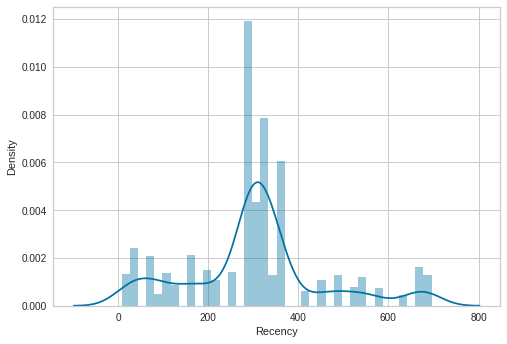

In [ ]:
#Recency distribution plot
import seaborn as sns
x = RFMScores['Recency']

ax = sns.distplot(x)

In [ ]:
#Descriptive Statistics (Frequency)
RFMScores.Frequency.describe()

count    1511.000000
mean       39.156188
std        56.275747
min         1.000000
25%        11.000000
50%        23.000000
75%        49.000000
max       789.000000
Name: Frequency, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



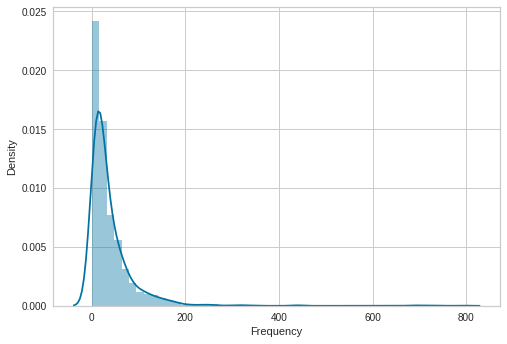

In [ ]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = RFMScores.query('Frequency < 1000')['Frequency']

ax = sns.distplot(x)

In [ ]:
#Descriptive Statistics (Monetary)
RFMScores.Monetary.describe()

count     1511.000000
mean       850.171807
std       2740.544772
min          0.850000
25%        203.960000
50%        371.390000
75%        757.655000
max      77183.600000
Name: Monetary, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



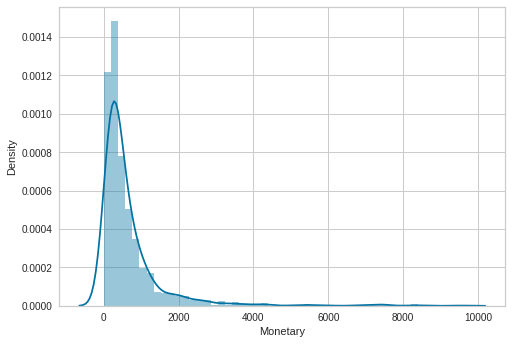

In [ ]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = RFMScores.query('Monetary < 10000')['Monetary']

ax = sns.distplot(x)

### RFM Score & Label

In [ ]:
#Split into four segments using quantiles
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [ ]:
quantiles

{'Recency': {0.25: 251.0, 0.5: 299.0, 0.75: 357.0},
 'Frequency': {0.25: 11.0, 0.5: 23.0, 0.75: 49.0},
 'Monetary': {0.25: 203.95999999999998,
  0.5: 371.39000000000004,
  0.75: 757.655}}

In [ ]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,3,4,1
12747.0,323,20,1009.31,3,3,1
12748.0,222,789,5014.32,1,1,1
12820.0,326,11,170.46,3,4,4
12823.0,289,2,535.50,2,4,2


In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,3,4,1,341,8
12747.0,323,20,1009.31,3,3,1,331,7
12748.0,222,789,5014.32,1,1,1,111,3
12820.0,326,11,170.46,3,4,4,344,11
12823.0,289,2,535.50,2,4,2,242,8


In [ ]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12346.0,325,1,77183.60,3,4,1,341,8,Gold
1,12747.0,323,20,1009.31,3,3,1,331,7,Gold
2,12748.0,222,789,5014.32,1,1,1,111,3,Platinum
3,12820.0,326,11,170.46,3,4,4,344,11,Bronze
4,12823.0,289,2,535.50,2,4,2,242,8,Gold


In [ ]:
#Validate the data for RFMGroup = 111
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,15061.0,8,168,22615.17,1,1,1,111,3,Platinum
1,17450.0,38,74,20649.04,1,1,1,111,3,Platinum
2,16029.0,37,57,19452.27,1,1,1,111,3,Platinum
3,17511.0,222,214,18356.86,1,1,1,111,3,Platinum
4,13089.0,191,438,15487.00,1,1,1,111,3,Platinum
5,15311.0,8,684,12848.30,1,1,1,111,3,Platinum
6,14298.0,161,342,11159.22,1,1,1,111,3,Platinum
7,13798.0,38,94,10761.40,1,1,1,111,3,Platinum
8,13694.0,222,130,10560.16,1,1,1,111,3,Platinum
9,14680.0,191,95,8284.12,1,1,1,111,3,Platinum


### Data Preparation for Clustering

In [ ]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RFMScores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



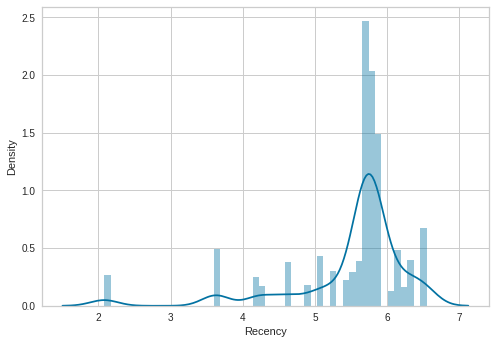

In [ ]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
ax = sns.distplot(Recency_Plot)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


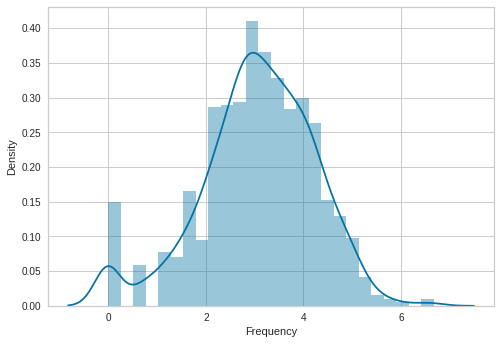

In [ ]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
ax = sns.distplot(Frequency_Plot)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


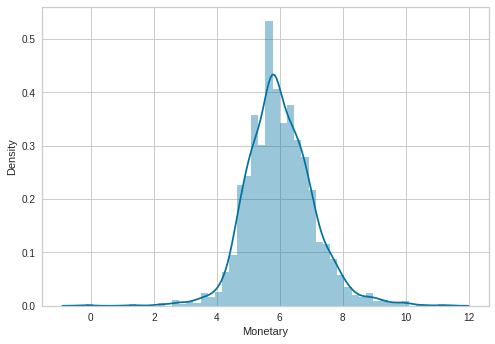

In [ ]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
ax = sns.distplot(Monetary_Plot)

In [ ]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns = Log_Tfd_Data.columns)

In [ ]:
Scaled_Data

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,0.339232,-2.600133,4.948401
12747.0,0.332017,-0.053930,0.855307
12748.0,-0.118932,3.069334,2.368157
12820.0,0.342839,-0.562151,-0.822702
12823.0,0.197333,-2.011175,0.256962
...,...,...,...
18257.0,0.202144,-0.243450,-0.107330
18259.0,0.817839,-0.946291,-0.076186
18260.0,-1.090576,0.468739,0.621254


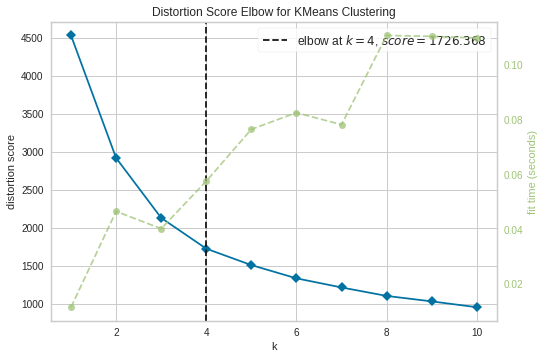

In [ ]:
model = KMeans()                                               # Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(model, k=(1, 11))                # Check the distortion/average distance in cluster if we create 1 to 11 group
visualizer.fit(Scaled_Data)                                    # Fit the data to the visualizer
visualizer.show()                                              # Finalize and render the figure
plt.show()

In [ ]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
RFMScores['Cluster'] = KMean_clust.labels_
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,3,4,1,341,8,Gold,2
12747.0,323,20,1009.31,3,3,1,331,7,Gold,2
12748.0,222,789,5014.32,1,1,1,111,3,Platinum,2
12820.0,326,11,170.46,3,4,4,344,11,Bronze,0
12823.0,289,2,535.50,2,4,2,242,8,Gold,3


In [ ]:
Label_Cluster = {0:"Cluster 1", 1:"Cluster 2", 2:"Cluster 3", 3:"Cluster 4"}
RFMScores['Label_Cluster'] = RFMScores['Cluster'].map(Label_Cluster)

In [ ]:
import plotly.express as px
fig = px.scatter_3d(RFMScores, x='Recency', y='Frequency', z='Monetary',
              color='Label_Cluster')
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(RFMScores, x='Recency', y='Frequency', z='Monetary',
              color='RFM_Loyalty_Level')
fig.show()

In [ ]:
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Label_Cluster
CustomerID,,,,,,,,,,,
12346.0,325,1,77183.60,3,4,1,341,8,Gold,2,Cluster 3
12747.0,323,20,1009.31,3,3,1,331,7,Gold,2,Cluster 3
12748.0,222,789,5014.32,1,1,1,111,3,Platinum,2,Cluster 3
12820.0,326,11,170.46,3,4,4,344,11,Bronze,3,Cluster 4
12823.0,289,2,535.50,2,4,2,242,8,Gold,1,Cluster 2
